In [1]:
import pandas as pd

In [2]:
genre = pd.read_csv('genre.csv')

In [3]:
genre['Genre'] = genre['Genre'].str.upper()

In [4]:
data = pd.read_csv('beatles_wiki_data.csv')

In [5]:
joined = genre.join(data.set_index('Song'),on = 'Song', how = 'inner')

In [6]:
joined.head()

,Song,Genre,Unnamed: 0,Core catalogue release(s),Songwriter(s),Lead vocal(s)[d],Year,Ref(s)
0,Across the Universe,ROCK,0,Let It BePast Masters,LennonMcCartney,John Lennon,1969,[49][50]
1,Act Naturally,COUNTRY,1,Help!,Johnny RussellVoni Morrison,Ringo Starr,1965,[51]
2,All I've Got to Do,POP ROCK,2,With the Beatles,LennonMcCartney,Lennon,1963,[52]
3,All My Loving,ROCK,3,With the Beatles,LennonMcCartney,Paul McCartney,1963,[52]
4,All Together Now,SKIFFLE,4,Yellow Submarine,LennonMcCartney,McCartney(with Lennon),1969,[53]


In [7]:
joined['Genre'].unique()

array(['ROCK', 'COUNTRY', 'POP ROCK', 'SKIFFLE', 'POP', 'PSYCHEDELIA',
       'SOUL', 'COUNTRY ROCK', 'PSYCHEDELIC POP', 'FOLK ROCK',
       'ROCK AND ROLL', 'CIRCUS MUSIC', 'SYMPHONIC ROCK', 'BLUES ROCK',
       'ART ROCK', 'BAROQUE POP', 'HARD ROCK', 'COUNTRY BLUES',
       'MERSEYBEAT', 'PSYCHEDELIC ROCK', 'FOLK-POP', 'SOFT ROCK',
       'ROCKABILLY', 'RAGTIME', 'FOLK POP', 'PSYCHEDELIC FOLK',
       'INDIAN MUSIC', 'MUSIC HALL', 'RHYTHM AND BLUES', 'FOLK',
       'ROOTS ROCK', 'SOUND COLLAGE', 'DOO WOP', 'POWER POP',
       'JANGLE POP', 'BLUES', 'EXPERIMENTAL POP', 'INDIAN CLASSICAL',
       'NOVELTY'], dtype=object)

In [8]:
len(joined.loc[joined['Genre'] == "PSYCHEDELIA"])

6

In [9]:
len(joined.loc[joined['Genre'] == "ROCK"])

28

In [10]:
# visualization
import matplotlib.pyplot as plt

# sound processing
import librosa
import librosa.display

# to play audio inline in ipython/jupyter notebooks
from IPython.display import Audio

# numpy
import numpy as np

In [11]:
psych = (joined.loc[joined['Genre'] == "PSYCHEDELIA"]).head()
rock = (joined.loc[joined['Genre'] == "ROCK"]).head()

In [12]:
paths = pd.read_csv('paths.csv')
paths = paths.rename(columns = {'WikiSong':'Song'})
paths = paths.drop('Unnamed: 0',axis=1)

In [13]:
rock_path = rock.join(paths.set_index('Song'),on = 'Song', how = 'inner')

In [14]:
psych_path = psych.join(paths.set_index('Song'),on = 'Song', how = 'inner')

In [15]:
rock_path

,Song,Genre,Unnamed: 0,Core catalogue release(s),Songwriter(s),Lead vocal(s)[d],Year,Ref(s),MetaPath,AudioPath
0,Across the Universe,ROCK,0,Let It BePast Masters,LennonMcCartney,John Lennon,1969,[49][50],Across the Universe_beats.csv,Across The Universe (#2).mp3
3,All My Loving,ROCK,3,With the Beatles,LennonMcCartney,Paul McCartney,1963,[52],All My Loving_beats.csv,All My Loving.mp3
9,Any Time at All,ROCK,10,A Hard Day's Night,LennonMcCartney,Lennon(with McCartney),1964,[56],Any Time At All_beats.csv,Any Time At All.mp3
26,Cry Baby Cry,ROCK,29,"The Beatles (""White Album"")",LennonMcCartney,Lennon(with McCartney),1968,[60],Cry Baby Cry_beats.csv,Cry Baby Cry.mp3
29,Dear Prudence,ROCK,32,"The Beatles (""White Album"")",LennonMcCartney,Lennon,1968,[60],Dear Prudence_beats.csv,Dear Prudence.mp3


In [16]:
stats = pd.read_csv('audio_stats1.csv')
stats = stats.rename(columns = {'0':'AudioPath'})
stats = stats.drop('Unnamed: 0',axis=1)
stats['AudioPath'] = stats['AudioPath'].str.slice(start=15)

In [17]:
psych_stats = psych_path.join(stats.set_index('AudioPath'),on = 'AudioPath', how = 'inner')

In [18]:
rock_stats = rock_path.join(stats.set_index('AudioPath'),on = 'AudioPath', how = 'inner')

In [19]:
import sklearn

In [20]:
folder = 'Beatles/tracks/'
psy_mp3 = psych_path['AudioPath'].iloc[0]
rock_mp3 = rock_path['AudioPath'].iloc[0]

In [21]:
psych_audio = librosa.load(folder + psy_mp3)
rock_audio = librosa.load(folder + rock_mp3)

/home/lkuo/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/lkuo/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


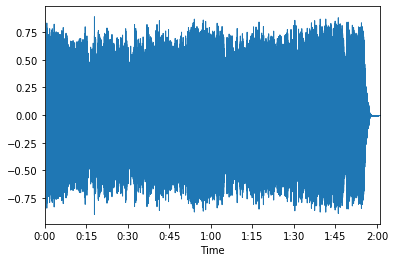

In [22]:
librosa.display.waveplot(psych_audio[0],sr = psych_audio[1])

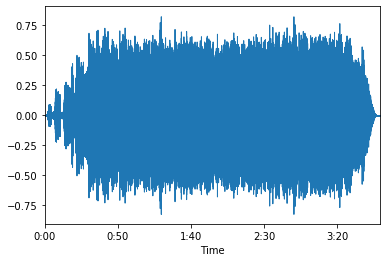

In [23]:
librosa.display.waveplot(rock_audio[0],sr = rock_audio[1])

In [24]:
psy_features = []
rock_features = []

for x in range(5):
    folder = 'Beatles/tracks/'
    psy_mp3 = psych_path['AudioPath'].iloc[x]
    psych_audio = librosa.load(folder + psy_mp3)
    load = psych_audio[0]
    sc_psych = librosa.feature.chroma_cens(load).T
    psy_features.append(sc_psych)
for x in range(5):
    folder = 'Beatles/tracks/'
    rock_mp3 = rock_path['AudioPath'].iloc[x]
    rock_audio = librosa.load(folder + rock_mp3)
    load = rock_audio[0]
    sc_rock = librosa.feature.chroma_cens(load).T
    rock_features.append(sc_rock)

/home/lkuo/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/lkuo/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/lkuo/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/lkuo/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/lkuo/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/lkuo/.loc

In [25]:
psy_tracks = np.vstack(psy_features)
rock_tracks = np.vstack(rock_features)

In [26]:
sc_labels = np.concatenate((np.zeros(len(psy_tracks)), np.ones(len(rock_tracks))))
sc_features = np.vstack((psy_tracks,rock_tracks))

In [27]:
model = sklearn.svm.SVC()
model.fit(sc_features,sc_labels)
model.predict(sc_features)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([1., 1., 1., ..., 0., 0., 0.])

In [28]:
com = data.join(paths.set_index('Song'),on = 'Song', how = 'inner')

In [29]:
len(com)

180

In [31]:

prop = []
for z in range(len(com)):
    folder = 'Beatles/tracks/'
    mp3 = com['AudioPath'].iloc[z]
    test, fs = librosa.load(folder+mp3, duration=10, offset=30)
    cc_test = librosa.feature.chroma_cens(test).T
    t = model.predict(cc_test)
    prop.append(sum(t)/len(t))

/home/lkuo/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/lkuo/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/lkuo/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/lkuo/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/lkuo/.local/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/lkuo/.loc

In [32]:
len(prop)

180

In [33]:
com['Rock to Psychedelia Scale'] = prop

In [34]:
com.head()

,Unnamed: 0,Song,Core catalogue release(s),Songwriter(s),Lead vocal(s)[d],Year,Ref(s),MetaPath,AudioPath,Rock to Psychedelia Scale
0,0,Across the Universe,Let It BePast Masters,LennonMcCartney,John Lennon,1969,[49][50],Across the Universe_beats.csv,Across The Universe (#2).mp3,0.691415
1,1,Act Naturally,Help!,Johnny RussellVoni Morrison,Ringo Starr,1965,[51],Act Naturally_beats.csv,Act Naturally.mp3,0.853828
2,2,All I've Got to Do,With the Beatles,LennonMcCartney,Lennon,1963,[52],All I've Got To Do_beats.csv,All I've Got To Do.mp3,0.719258
3,3,All My Loving,With the Beatles,LennonMcCartney,Paul McCartney,1963,[52],All My Loving_beats.csv,All My Loving.mp3,0.707657
5,5,All You Need Is Love,Magical Mystery Tour,LennonMcCartney,Lennon,1967,[54][55],All You Need Is Love_beats.csv,All You Need Is Love.mp3,0.412993


In [35]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

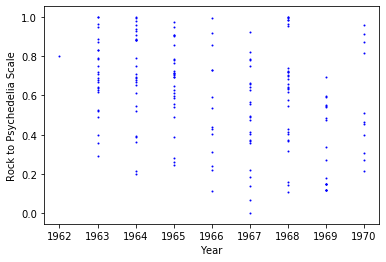

In [36]:
com.plot.scatter(x='Year', y='Rock to Psychedelia Scale',c='Blue',s = 1)
plt.savefig("Rock_Psychedelia.png")